In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
sns.set(style="whitegrid")

In [3]:
data_path = '../data/raw/Churn_Modelling_All.csv'
df = pd.read_csv(data_path)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


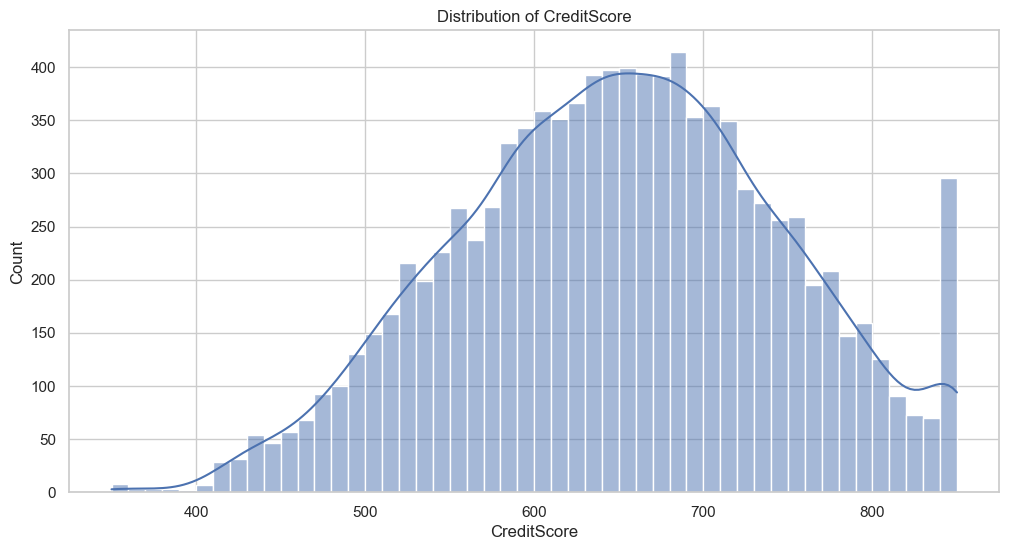

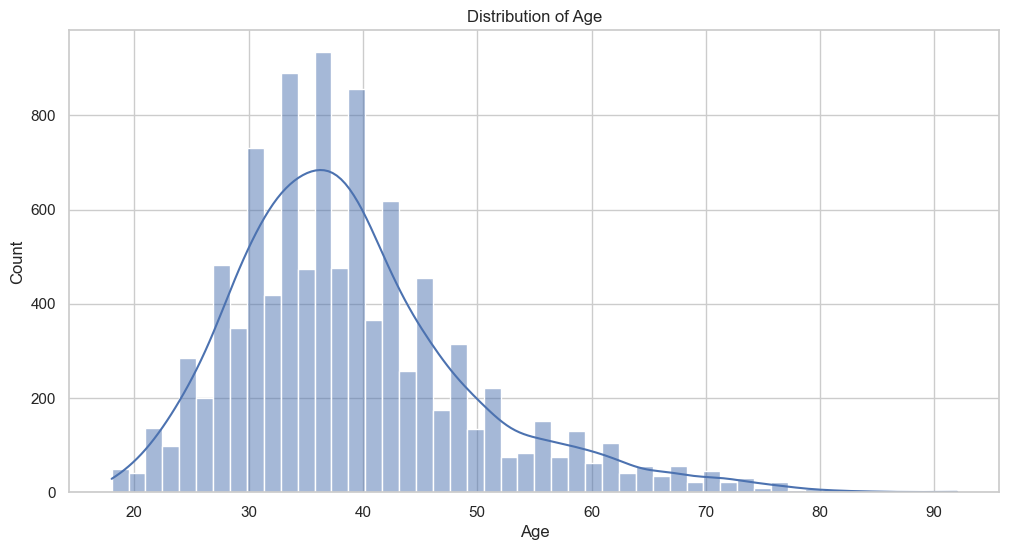

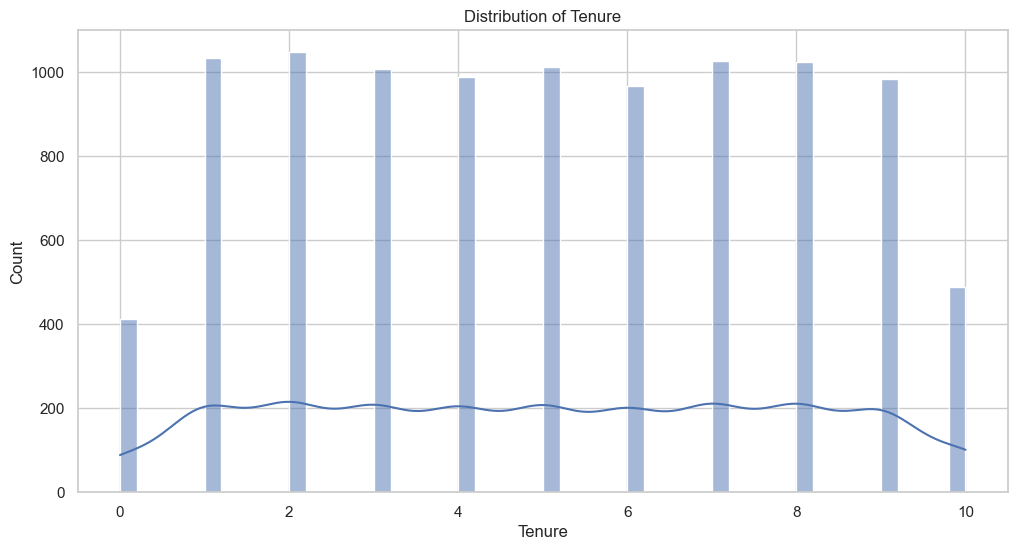

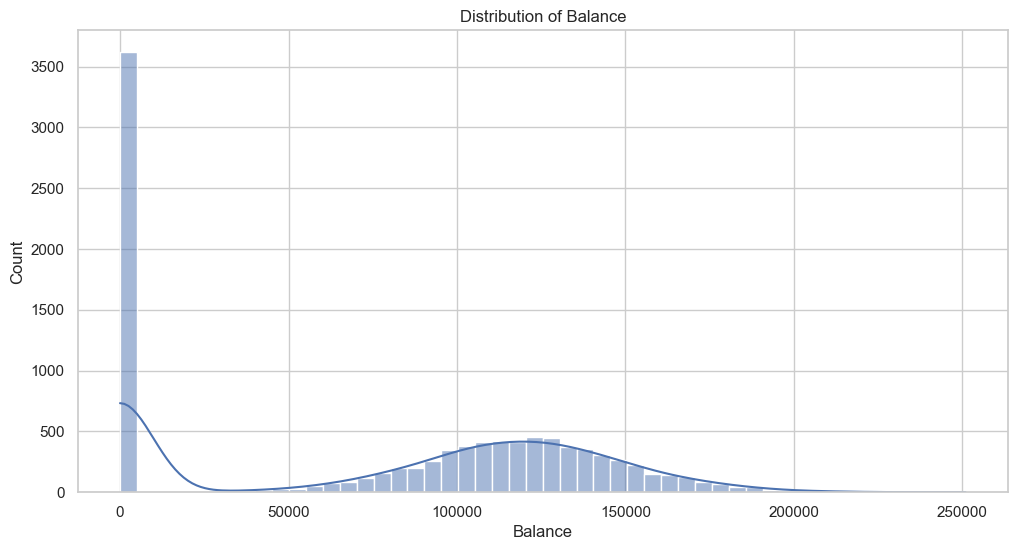

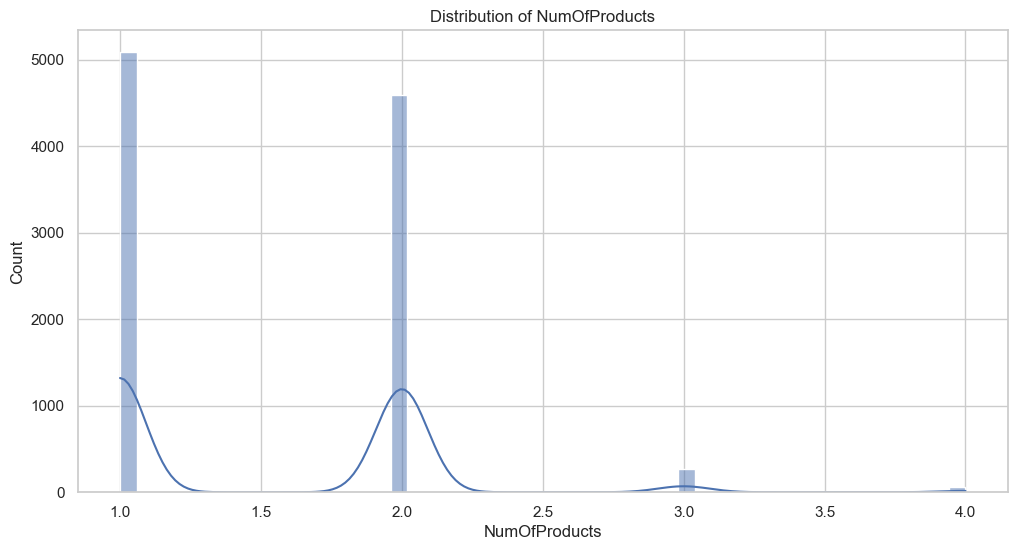

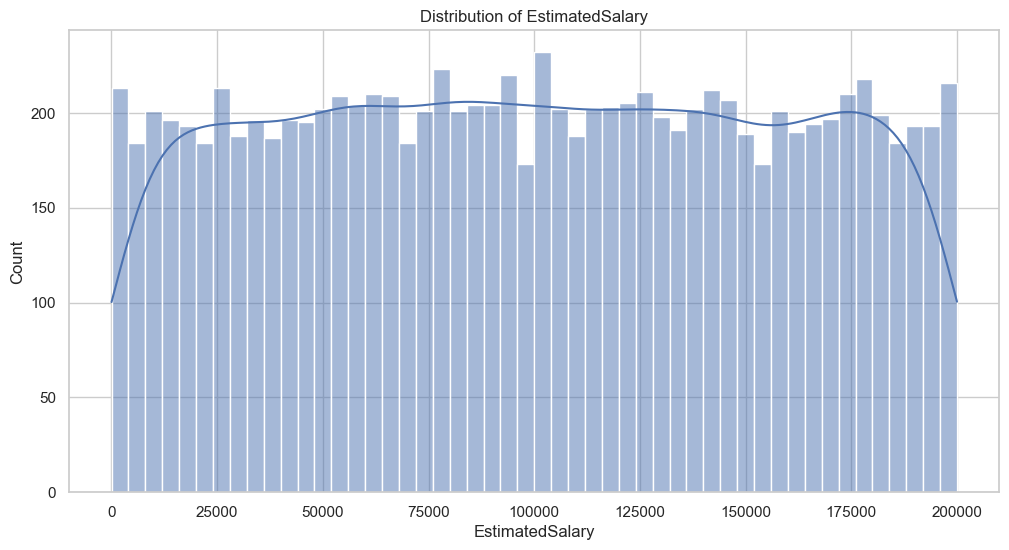

In [8]:
# Visualize the distribution of numeric features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

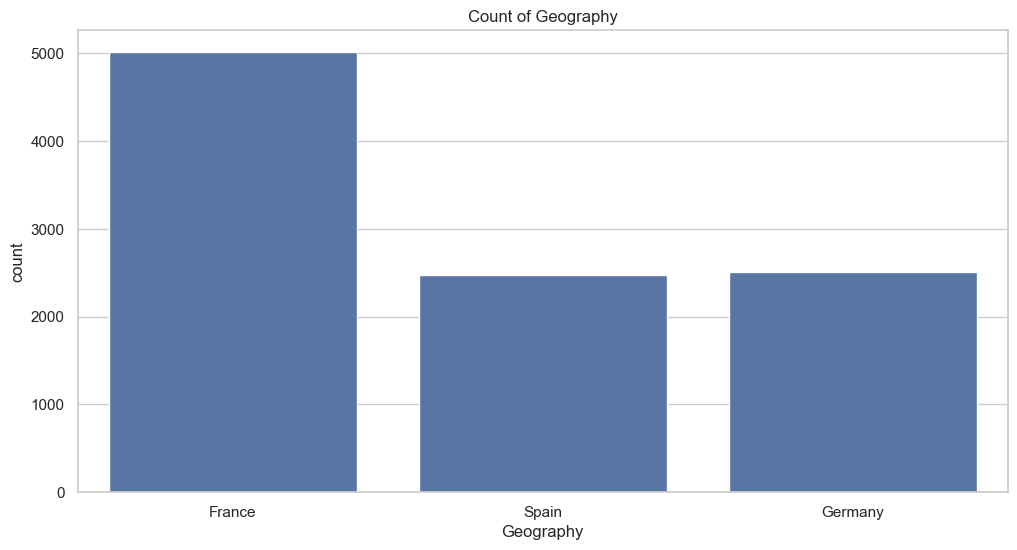

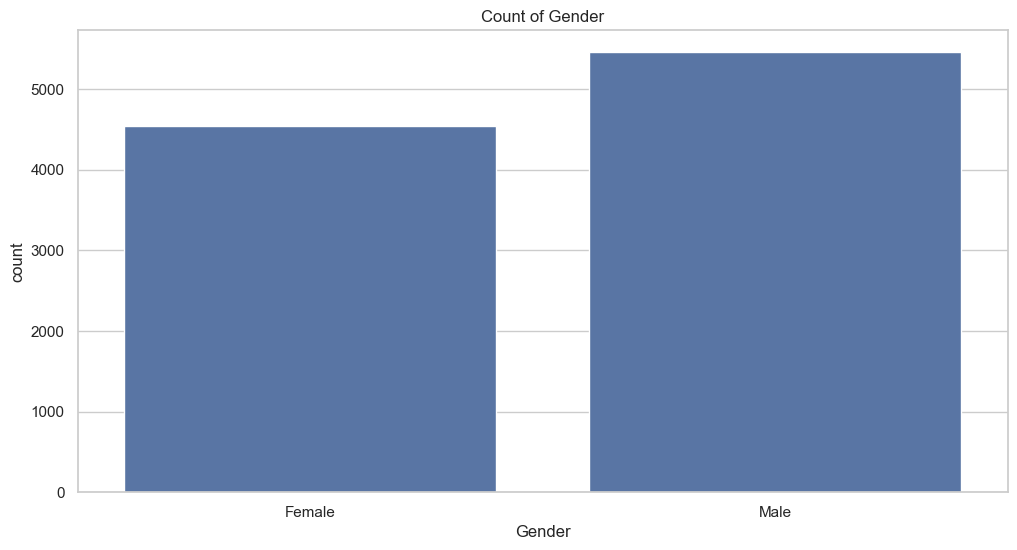

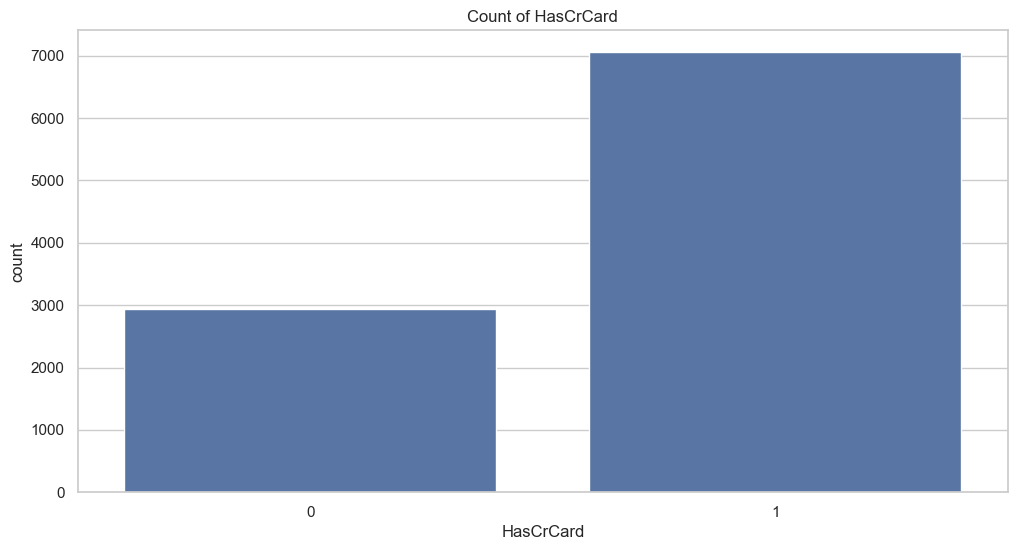

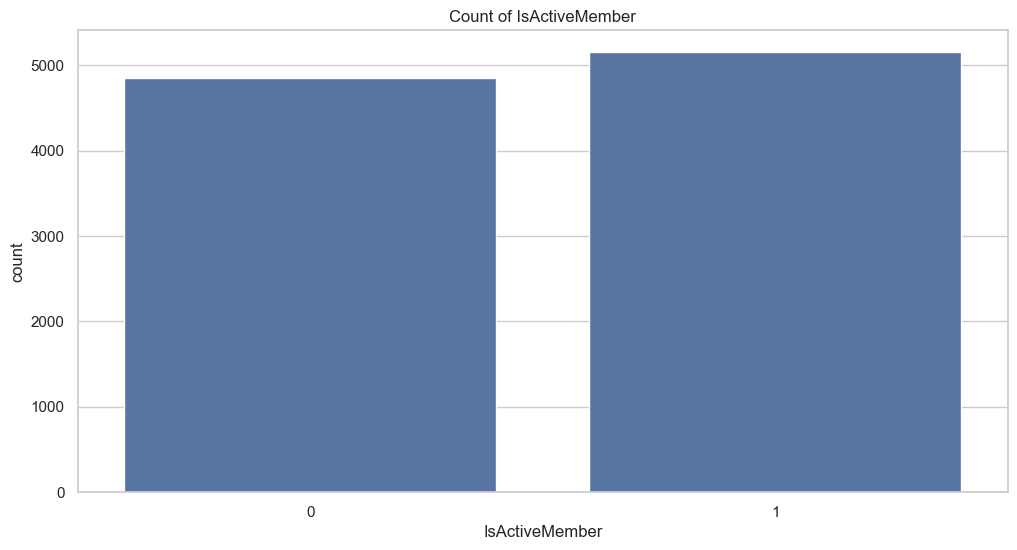

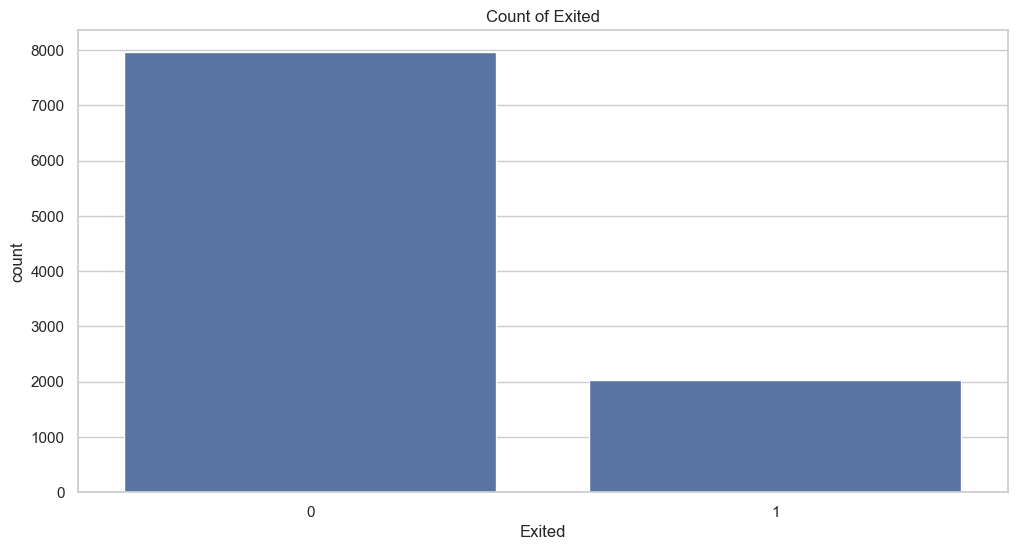

In [9]:
# Visualize the distribution of categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.show()

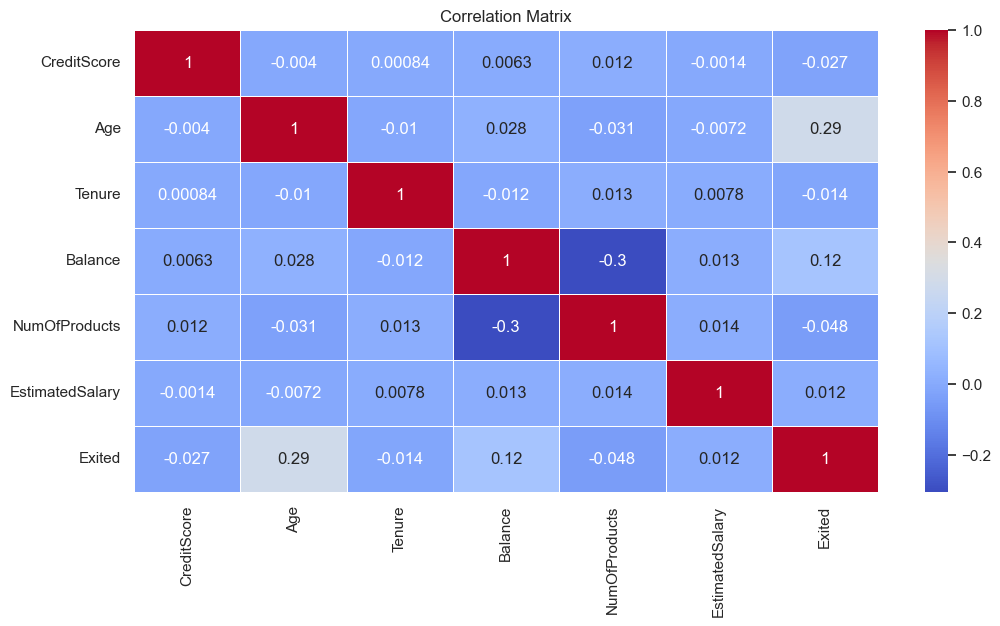

In [10]:
# Correlation matrix (numeric columns only)
plt.figure(figsize=(12, 6))
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
numeric_df = df[numeric_features]  # Select only numeric columns
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Print correlation with the target variable
target = 'Exited'
print(corr_matrix[target].sort_values(ascending=False))

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Name: Exited, dtype: float64


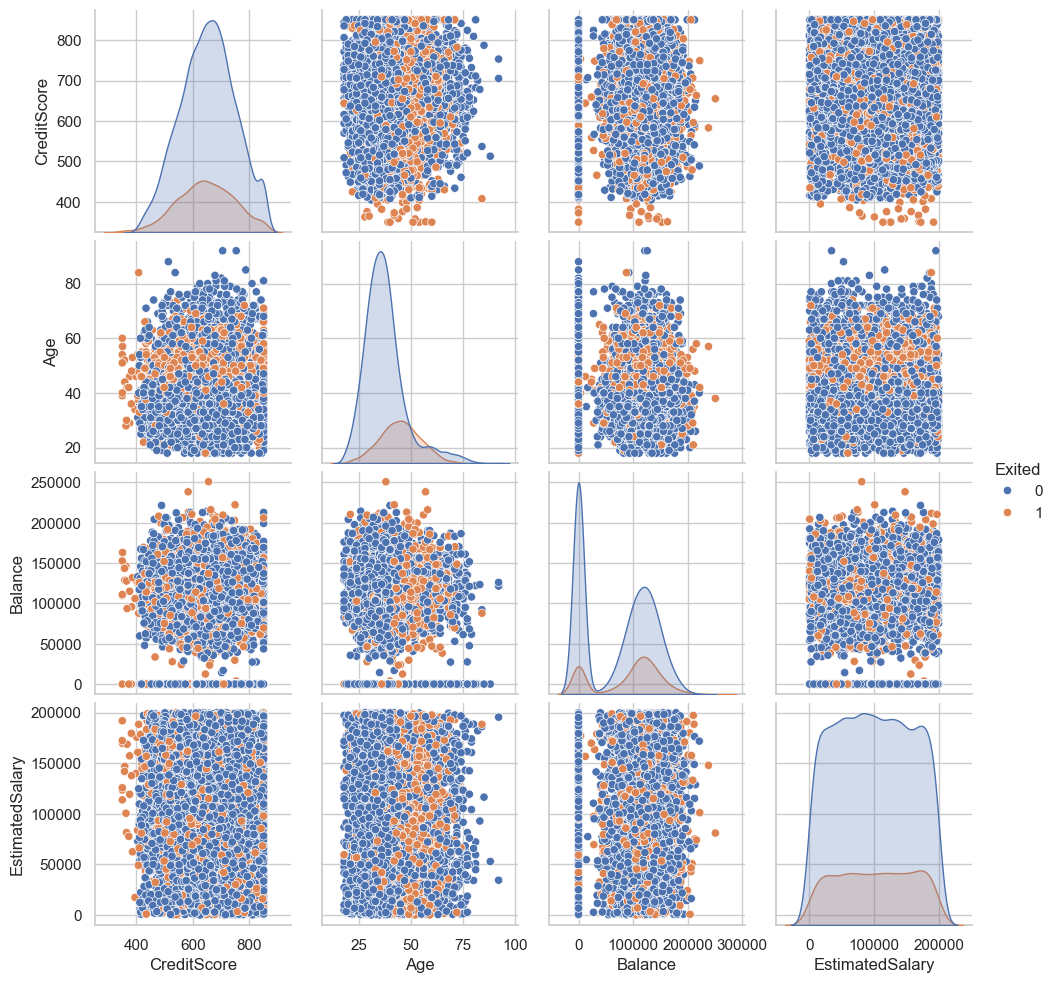

In [12]:
# Pairplot for selected features
selected_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(df[selected_features], hue='Exited')
plt.show()

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Convert Gender to binary (0 and 1)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [15]:

# Define features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split the data into train, validation, test, and production test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify the sizes
print(f"Training set size: {X_train.shape[0]} records")
print(f"Validation set size: {X_valid.shape[0]} records")
print(f"Test set size: {X_test.shape[0]} records")

# Identify numeric and binary columns
numeric_features = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
binary_features = ['HasCrCard', 'IsActiveMember', 'Gender']
categorical_features = ['Geography']
binning_features = ['CreditScore']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features),  # Pass through binary features without change
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # One-hot encode categorical features
        ('credit_bin', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), binning_features)  # Binning for CreditScore
    ], remainder='passthrough')  # Ensure passthrough for any remaining columns

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the validation and test data
X_valid_preprocessed = pipeline.transform(X_valid)
X_test_preprocessed = pipeline.transform(X_test)

# Print the shape of the transformed training data
print(f"Transformed training data shape: {X_train_preprocessed.shape}")

# Generate feature names for all features including one-hot encoded features
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
preprocessor_feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features).tolist() +
    binary_features +
    onehot_feature_names +
    binning_features  # Single binned CreditScore column
)

# Ensure the number of feature names matches the number of columns in the transformed data
assert len(preprocessor_feature_names) == X_train_preprocessed.shape[1], "Number of feature names does not match the number of columns in the transformed data."

# Convert the preprocessed data back to DataFrame for better readability
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor_feature_names)
X_valid_preprocessed_df = pd.DataFrame(X_valid_preprocessed, columns=preprocessor_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessor_feature_names)

# Display the first few rows of the preprocessed training data
print(X_train_preprocessed_df.head())

Training set size: 7500 records
Validation set size: 1250 records
Test set size: 1250 records
Transformed training data shape: (7500, 11)
        Age    Tenure   Balance  NumOfProducts  EstimatedSalary  HasCrCard  \
0  1.328762  1.028955  0.761715       0.803861         1.237787        0.0   
1 -0.092881 -0.699103  0.234517      -0.914771         1.095526        0.0   
2  1.423538  1.374567  0.337508      -0.914771         1.679687        1.0   
3 -0.377209 -0.353492  0.225786      -0.914771        -1.378660        1.0   
4  0.191448 -1.390327  0.119901      -0.914771         0.226947        0.0   

   IsActiveMember  Gender  Geography_Germany  Geography_Spain  CreditScore  
0             1.0     0.0                0.0              0.0          7.0  
1             1.0     1.0                0.0              0.0          3.0  
2             1.0     0.0                1.0              0.0          4.0  
3             1.0     0.0                0.0              0.0          5.0  
4       

In [16]:
# Assuming the preprocessed data is already available
# X_train_preprocessed_df, X_valid_preprocessed_df, X_test_preprocessed_df

# Separate features and target
y_train = y_train
X_train = X_train_preprocessed_df

y_valid = y_valid
X_valid = X_valid_preprocessed_df

y_test = y_test
X_test = X_test_preprocessed_df

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate on validation set
y_valid_pred = model.predict(X_valid)
print("Validation Set Performance:")
print(f"Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Precision: {precision_score(y_valid, y_valid_pred):.4f}")
print(f"Recall: {recall_score(y_valid, y_valid_pred):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_valid_pred):.4f}")
print(confusion_matrix(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Train final model with best parameters on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on the validation set with the best model
y_valid_pred_best = best_model.predict(X_valid)
print("Validation Set Performance with Best Model:")
print(f"Accuracy: {accuracy_score(y_valid, y_valid_pred_best):.4f}")
print(f"Precision: {precision_score(y_valid, y_valid_pred_best):.4f}")
print(f"Recall: {recall_score(y_valid, y_valid_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_valid_pred_best):.4f}")
print(confusion_matrix(y_valid, y_valid_pred_best))
print(classification_report(y_valid, y_valid_pred_best))

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.8104
Precision: 0.6098
Recall: 0.1961
F1 Score: 0.2967
[[963  32]
 [205  50]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       995
           1       0.61      0.20      0.30       255

    accuracy                           0.81      1250
   macro avg       0.72      0.58      0.59      1250
weighted avg       0.78      0.81      0.77      1250

Best parameters found by GridSearchCV:
{'C': 1, 'solver': 'lbfgs'}
Validation Set Performance with Best Model:
Accuracy: 0.8104
Precision: 0.6098
Recall: 0.1961
F1 Score: 0.2967
[[963  32]
 [205  50]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       995
           1       0.61      0.20      0.30       255

    accuracy                           0.81      1250
   macro avg       0.72      0.58      0.59      1250
weighted avg       0.78      0.81      0.77      1250

Test Set Performance:
Accur

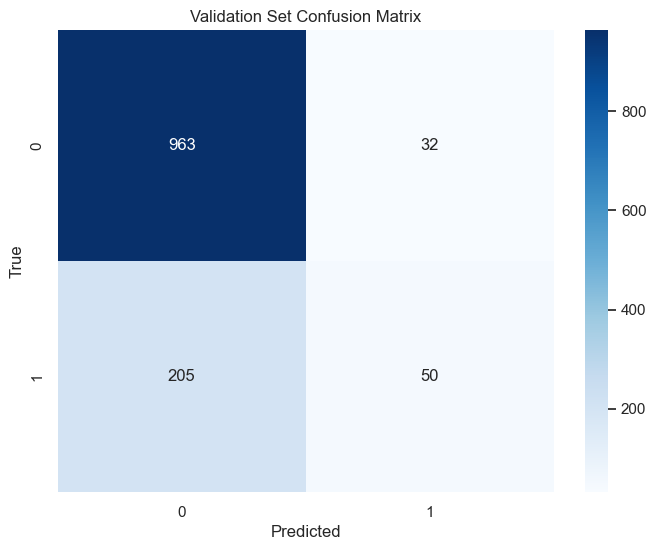

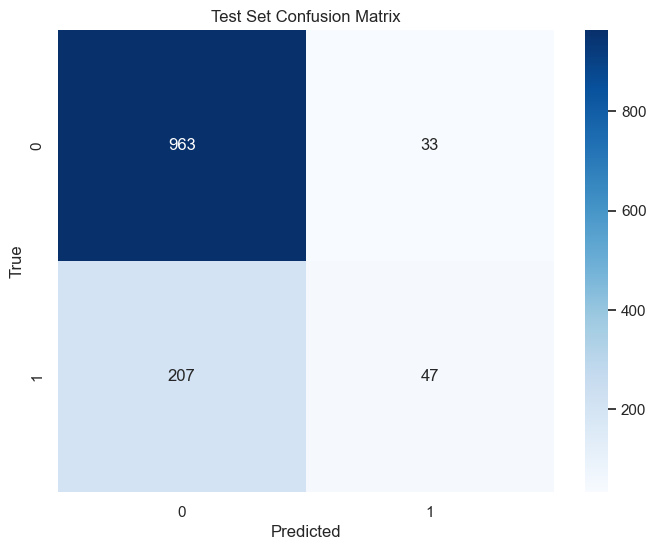

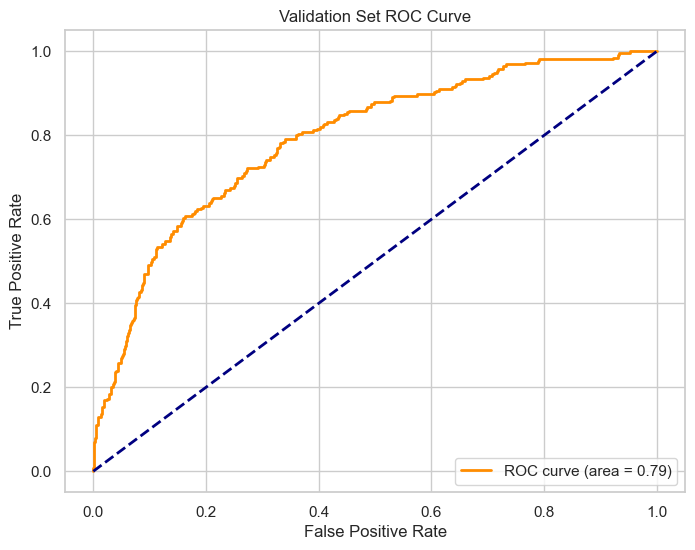

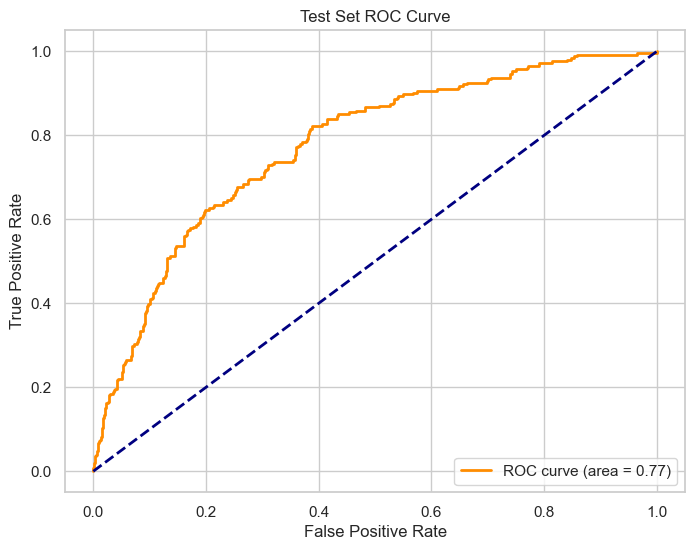

In [17]:
# Confusion matrix visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Validation set performance
plot_confusion_matrix(y_valid, y_valid_pred_best, 'Validation Set Confusion Matrix')

# Test set performance
plot_confusion_matrix(y_test, y_test_pred, 'Test Set Confusion Matrix')

# Validation set ROC Curve
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for validation set
y_valid_pred_prob = best_model.predict_proba(X_valid)[:, 1]
plot_roc_curve(y_valid, y_valid_pred_prob, 'Validation Set ROC Curve')

# Plot ROC Curve for test set
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_test_pred_prob, 'Test Set ROC Curve')

In [ ]:
# List of models to experiment with
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True))
]

# Dictionary to store results
results = {}

for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Evaluate on validation set
    y_valid_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_valid_pred)
    precision = precision_score(y_valid, y_valid_pred)
    recall = recall_score(y_valid, y_valid_pred)
    f1 = f1_score(y_valid, y_valid_pred)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': confusion_matrix(y_valid, y_valid_pred),
        'classification_report': classification_report(y_valid, y_valid_pred)
    }

# Display results
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("Classification Report:")
    print(metrics['classification_report'])

In [ ]:
# Random Forest Hyperparameter Tunning

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Display the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model on the validation set
y_valid_pred = best_rf.predict(X_valid)
print("Validation Set Performance with Best Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Precision: {precision_score(y_valid, y_valid_pred):.4f}")
print(f"Recall: {recall_score(y_valid, y_valid_pred):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_valid_pred):.4f}")
print(confusion_matrix(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))

# Evaluate the best model on the test set
y_test_pred = best_rf.predict(X_test)
print("Test Set Performance with Best Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

In [ ]:
# XGBoost
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Display the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model on the validation set
y_valid_pred = best_xgb.predict(X_valid)
print("Validation Set Performance with Best XGBoost Model:")
print(f"Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Precision: {precision_score(y_valid, y_valid_pred):.4f}")
print(f"Recall: {recall_score(y_valid, y_valid_pred):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_valid_pred):.4f}")
print(confusion_matrix(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))

# Evaluate the best model on the test set
y_test_pred = best_xgb.predict(X_test)
print("Test Set Performance with Best XGBoost Model:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))